<a href="https://colab.research.google.com/github/bhavanasanne/CodSoft/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf #to build the models
import numpy as np
import matplotlib.pyplot as plt #for visualisation
import cv2 as cv #for taking the images
data=tf.keras.datasets.mnist #storing the dataset in variable data
from tensorflow.python.keras.metrics import accuracy
#splitting the data into train and test
#loading the data using load_data inbuilt function
(x_train,y_train),(x_test,y_test)=data.load_data()
#Compressing the data between 0 and 1 using normalisation
#if the data is 2 then it compresses to 0.023
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
#We are not normalising y
#because y is the independent variable and we will predict y
model=tf.keras.models.Sequential() #building the model
#adding input layer i.e flatten layer
#which is 1 dimension
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #pixels
#Adding hidden layers ie dense layers
#units are no of neurons
model.add(tf.keras.layers.Dense(units=128))
model.add(tf.keras.layers.Dense(units=128))
#output layer
#softmax takes all the outputs
#scales them up to 1
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Training the model
#epoch for seeing the same data
#in this the model sees the same data 3 times
model.fit(x_train,y_train,epochs=3)
#calculating loss and accuracy
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 21s 10ms/step - loss: 0.3712 - accuracy: 0.8927
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3068 - accuracy: 0.9116
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.9154
0.9154000282287598
0.29940369725227356


In [ ]:
model.save('CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 61ms/step


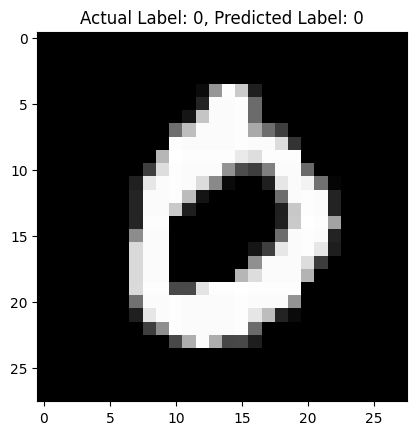

1/1 [==============================] - 0s 25ms/step


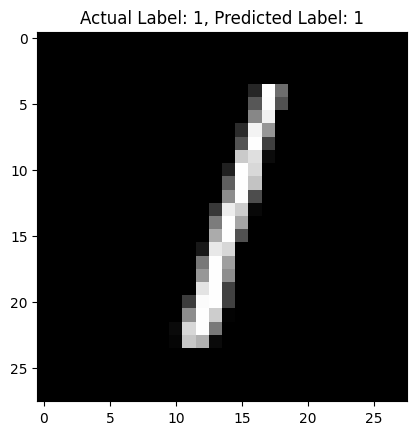

1/1 [==============================] - 0s 22ms/step


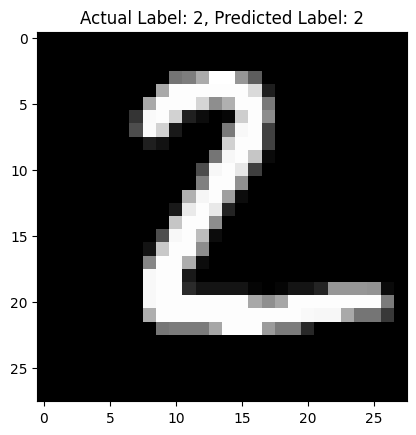

1/1 [==============================] - 0s 24ms/step


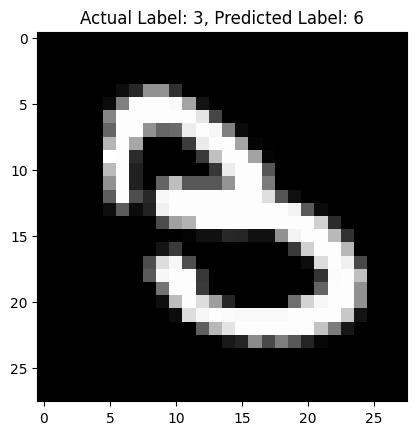

1/1 [==============================] - 0s 24ms/step


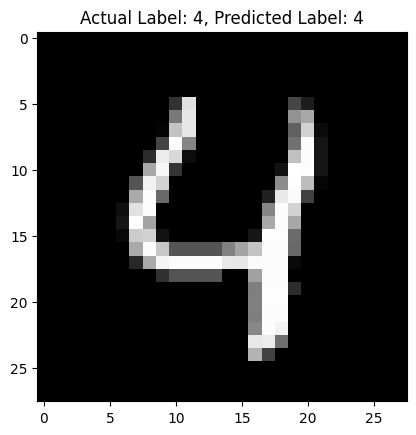

1/1 [==============================] - 0s 22ms/step


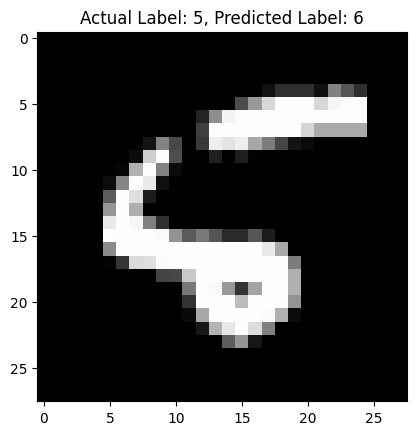

1/1 [==============================] - 0s 21ms/step


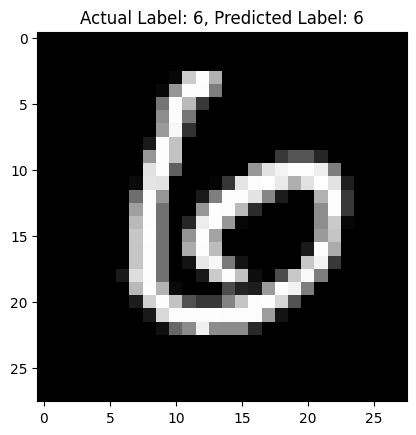

1/1 [==============================] - 0s 22ms/step


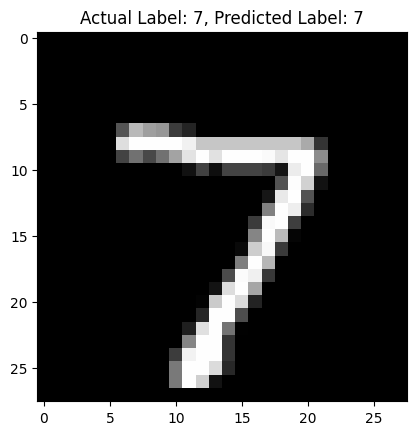

1/1 [==============================] - 0s 23ms/step


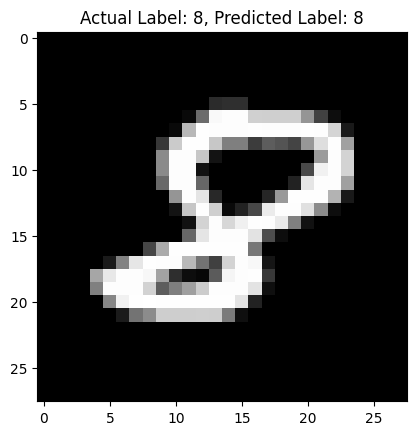

1/1 [==============================] - 0s 24ms/step


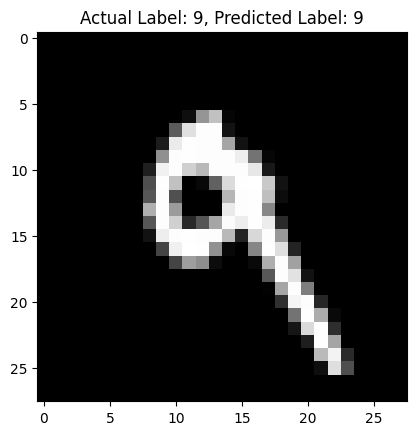

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_test = x_test / 255.0

# Load the trained model
model = tf.keras.models.load_model('CNN.h5')  # Replace 'CNN.h5' with the actual path to your trained model

# Define a function to predict and display an image
def predict_and_display(test_image, true_label):
    test_image = np.reshape(test_image, (1, 28, 28, 1))
    result = model.predict(test_image)
    predicted_label = np.argmax(result)

    plt.imshow(test_image.reshape(28, 28), cmap='gray')
    plt.title(f'Actual Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()

# Predict and display images for numbers 0-9
for digit in range(10):
    digit_indices = np.where(y_test == digit)[0]
    if len(digit_indices) > 0:
        test_image_index = digit_indices[0]  # Use the first image of each digit
        predict_and_display(x_test[test_image_index], y_test[test_image_index])
